In [0]:
from google.colab import drive,files

In [0]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
from PIL import Image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
import pandas as pd
import pickle
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

Using TensorFlow backend.


In [0]:
# dir path
datadirpath = 'gdrive/My Drive/DL Project/Data/ready_chinese_food'
labeldirpath = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/IngreLabel.txt'
IngredientList = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/IngredientList.txt'
IngredientTypeSheet = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/IngredientType.xlsx'

trainlistpath = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/TR.txt'
vallistpath = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/VAL.txt'
testlistpath = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/TE.txt'

pickletraindata_X = 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_train_full.pkl'
picklevaldata_X = 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_val_full.pkl'
pickletestdata_X = 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_test_full.pkl'

pickletraindata_Y1 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainFull_Y1.pkl'
picklevaldata_Y1 = 'gdrive/My Drive/DL Project/PickleFiles/pickleValFull_Y1.pkl'
pickletestdata_Y1 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTestFull_Y1.pkl'

pickletraindata_Y2 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainFull_Y2.pkl'
picklevaldata_Y2 = 'gdrive/My Drive/DL Project/PickleFiles/pickleValFull_Y2.pkl'
pickletestdata_Y2 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTestFull_Y2.pkl'

pickletraindata_Y3 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainFull_Y3.pkl'
picklevaldata_Y3 = 'gdrive/My Drive/DL Project/PickleFiles/pickleValFull_Y3.pkl'
pickletestdata_Y3 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTestFull_Y3.pkl'

pickletraindata_X_new= 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_train_balanced'
picklevaldata_X_new = 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_val_balanced.pkl'
pickletestdata_X_new = 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_test_balanced.pkl'

pickletraindata_Y1_new = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainBalanced_Y1'
picklevaldata_Y1_new = 'gdrive/My Drive/DL Project/PickleFiles/pickleValBalanced_Y1.pkl'
pickletestdata_Y1_new = 'gdrive/My Drive/DL Project/PickleFiles/pickleTestBalanced_Y1.pkl'

pickletraindata_Y2_new = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainBalanced_Y2'
picklevaldata_Y2_new = 'gdrive/My Drive/DL Project/PickleFiles/pickleValBalanced_Y2.pkl'
pickletestdata_Y2_new = 'gdrive/My Drive/DL Project/PickleFiles/pickleTestBalanced_Y2.pkl'

pickletraindata_Y3_new = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainBalanced_Y3'
picklevaldata_Y3_new = 'gdrive/My Drive/DL Project/PickleFiles/pickleValBalanced_Y3.pkl'
pickletestdata_Y3_new = 'gdrive/My Drive/DL Project/PickleFiles/pickleTestBalanced_Y3.pkl'

credentialFile = 'gdrive/My Drive/DL Project/Credentials/Food-Ingredient-cred.json'
#pickleModelC_IngFood.pkl
#Models Pickled
pickleModelA1_IngFood = 'gdrive/My Drive/DL Project/PickleFiles/pickleModelA1_IngFood.pkl'



In [0]:
train_Y1_list = pickle.load(open(pickletraindata_Y1, 'rb' ))
train_Y1 = np.array(train_Y1_list)
print(train_Y1.shape)

(66071, 172)


In [0]:
train_Y2_list = pickle.load(open(pickletraindata_Y2, 'rb' ))
train_Y2 = np.array(train_Y2_list)

for index in range(train_Y2.shape[0]):
  templist = train_Y2[index]
  templist_0 = [0 if x==-1 else x for x in templist]
  train_Y2[index] = templist_0

print(train_Y2.shape)

(66071, 353)


In [0]:
val_Y1_list = pickle.load(open(picklevaldata_Y1, 'rb' ))
val_Y1 = np.array(val_Y1_list)
print(val_Y1.shape)

(11016, 172)


In [0]:
val_Y2_list = pickle.load(open(picklevaldata_Y2, 'rb' ))
val_Y2 = np.array(val_Y2_list)

for index in range(val_Y2.shape[0]):
  templist = val_Y2[index]
  templist_0 = [0 if x==-1 else x for x in templist]
  val_Y2[index] = templist_0
  
print(val_Y2.shape)

(11016, 353)


In [0]:
# Loading test_Y1

test_Y1_list = pickle.load(open(pickletestdata_Y1, 'rb' ))
test_Y1 = np.array(test_Y1_list)
print(test_Y1.shape)

test_Y3 = pickle.load(open(pickletestdata_Y3,"rb"))
# Loading test_Y2

test_Y2_list = pickle.load(open(pickletestdata_Y2, 'rb' ))
test_Y2 = np.array(test_Y2_list)

for index in range(test_Y2.shape[0]):
  templist = test_Y2[index]
  templist_0 = [0 if x==-1 else x for x in templist]
  test_Y2[index] = templist_0
  
print(test_Y2.shape)

(33154, 172)
(33154, 353)


In [0]:
train_Y3 = pickle.load(open(pickletraindata_Y3,"rb"))
val_Y3 = pickle.load(open(picklevaldata_Y3,"rb"))


In [0]:
train_Y3[99]

1





58892288/58889256 [==============================] - 6s 0us/step






25001
25002
25003
25004
25005
25006
25007
25008
25009
25010
25011
25012
25013
25014
25015
25016
25017
25018
25019
25020
25021
25022
25023
25024
25025
25026
25027
25028
25029
25030
25031
25032
25033
25034
25035
25036
25037
25038
25039
25040
25041
25042
25043
25044
25045
25046
25047
25048
25049
25050
25051
25052
25053
25054
25055
25056
25057
25058
25059
25060
25061
25062
25063
25064
25065
25066
25067
25068
25069
25070
25071
25072
25073
25074
25075
25076
25077
25078
25079
25080
25081
25082
25083
25084
25085
25086
25087
25088
25089
25090
25091
25092
25093
25094
25095
25096
25097
25098
25099
25100
25101
25102
25103
25104
25105
25106
25107
25108
25109
25110
25111
25112
25113
25114
25115
25116
25117
25118
25119
25120
25121
25122
25123
25124
25125
25126
25127
25128
25129
25130
25131
25132
25133
25134
25135
25136
25137
25138
25139
25140
25141
25142
25143
25144
25145
25146
25147
25148
25149
25150
25151
25152
25153
25154
2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


25275
25276
25277
25278
25279
25280
25281
25282
25283
25284
25285
25286
25287
25288
25289
25290
25291
25292
25293
25294
25295
25296
25297
25298
25299
25300
25301
25302
25303
25304
25305
25306
25307
25308
25309
25310
25311
25312
25313
25314
25315
25316
25317
25318
25319
25320
25321
25322
25323
25324
25325
25326
25327
25328
25329
25330
25331
25332
25333
25334
25335
25336
25337
25338
25339
25340
25341
25342
25343
25344
25345
25346
25347
25348
25349
25350
25351
25352
25353
25354
25355
25356
25357
25358
25359
25360
25361
25362
25363
25364
25365
25366
25367
25368
25369
25370
25371
25372
25373
25374
25375
25376
25377
25378
25379
25380
25381
25382
25383
25384
25385
25386
25387
25388
25389
25390
25391
25392
25393
25394
25395
25396
25397
25398
25399
25400
25401
25402
25403
25404
25405
25406
25407
25408
25409
25410
25411
25412
25413
25414
25415
25416
25417
25418
25419
25420
25421
25422
25423
25424
25425
25426
25427
25428
25429
25430
25431
25432
25433
25434
25435
25436
25437
25438
25439
25440
2544

KeyboardInterrupt: ignored

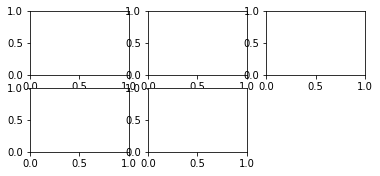

In [0]:
# Reading the image data X,extracting features from it using VGG16 and persisting the consolidated list of features as pickle file

'''
# load the image
img = load_img('bird.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()
'''

file = open(trainlistpath,"r")
featurelist = []
new_train_Y1 = []
new_train_Y2 = []
new_train_Y3 = []
count = 0
new_count = 0
model = VGG16(weights='imagenet', include_top=False)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=360)
for filename in file:
    count = count +1
    if count<=25000:
      continue
    print(count)
    path = datadirpath + filename.strip()
    img = load_img(path, target_size=(224 , 224))
    #print("******type:",type(img))
    x = image.img_to_array(img)
    samples = expand_dims(x, 0)
    # prepare iterator
    it = datagen.flow(samples, batch_size=1)
    #print(train_Y3[count])
    if train_Y3[count]==0:
      for i in range(5):
          # define subplot
          pyplot.subplot(330 + 1 + i)
          # generate batch of images
          batch = it.next()
          # convert to unsigned integers for viewing
          img = batch[0].astype('uint8')
          # plot raw pixel data
          #pyplot.imshow(img)
          x = image.img_to_array(img)
          samples = expand_dims(x, 0)
          x = preprocess_input(samples)
          features = model.predict(x)
          featurelist.append(features)
          new_train_Y1.append(train_Y1[count])
          new_train_Y2.append(train_Y2[count])
          new_train_Y3.append(train_Y3[count])

    else:
        x = preprocess_input(samples)
        features = model.predict(x)
        featurelist.append(features)
        new_train_Y1.append(train_Y1[count])
        new_train_Y2.append(train_Y2[count])
        new_train_Y3.append(train_Y3[count])
    # show the figure
    #pyplot.show()
    
    
    #if(count >= 20000):
    #  break
    if count%5000==0:
      
      pickle.dump(featurelist,open(pickletraindata_X_new+str(count)+".pkl","wb"))
      pickle.dump(new_train_Y1,open(pickletraindata_Y1_new+str(count)+".pkl","wb"))
      pickle.dump(new_train_Y2,open(pickletraindata_Y2_new+str(count)+".pkl","wb"))
      pickle.dump(new_train_Y3,open(pickletraindata_Y3_new+str(count)+".pkl","wb"))
      featurelist = []
      new_train_Y1 = []
      new_train_Y2 = []
      new_train_Y3 = []

#pickle.dump(featurelist, open(pickletraindata_X_new, 'wb'))

In [0]:
len(featurelist),len(new_train_Y1),len(new_train_Y2),len(new_train_Y3)

(4969, 4969, 4969, 4969)

In [0]:
pickle.dump(featurelist,open(pickletraindata_X_new+str(count)+".pkl","wb"))
pickle.dump(new_train_Y1,open(pickletraindata_Y1_new+str(count)+".pkl","wb"))
pickle.dump(new_train_Y2,open(pickletraindata_Y2_new+str(count)+".pkl","wb"))
pickle.dump(new_train_Y3,open(pickletraindata_Y3_new+str(count)+".pkl","wb"))

In [0]:
# Reading the training Y1 data and saving them into a consolidated csv file of 1000 sample each.

file = open(trainlistpath,"r")
datalist = []
count = 0
for filename in file:
  count = count +1
  image_dir = filename.split("/")[1]
  index = int(image_dir) - 1
  onehot_encoded = [0 if i !=index else 1 for i in range(172)]
  datalist.append(onehot_encoded)
  if(count >= 20000):
      break
 

In [0]:
pickle.dump(datalist, open(pickletraindata_Y1_new, 'wb'))

In [0]:
# Reading the training Y2 data and saving them into a consolidated csv file of 1000 sample each.

trainlistfile = open(trainlistpath,"r")
labelfile = open(labeldirpath,"r")

trainlist = []
for name in trainlistfile:
  trainlist.append(name)

labeldatamap = {}
for entry in labelfile:
  record = entry.strip().split(" ")
  key = record[0]
  values = record[1:]
  int_labels =  [int(i) for i in values]
  labeldatamap[key] = int_labels

print("labeldatamap length : " + str(len(labeldatamap)))
  
y2list = []
count = 0
for entry in trainlist:
  filename = entry.strip()
  count = count +1
  y2value = labeldatamap[filename]
  y2list.append(y2value)
  if(count >= 20000):
    break

labeldatamap length : 110241


In [0]:
print(len(y2list))

20000


In [0]:
pickle.dump(y2list, open(pickletraindata_Y2_new, 'wb'))

In [0]:
new_val_X = []
new_val_Y1 = []
new_val_Y2 = []
new_val_Y3 = []

In [0]:
# Reading the validation image data X,extracting features from it using VGG16 and persisting the consolidated list of features as pickle file

file = open(vallistpath,"r")
featurelist = []
count = 0
model = VGG16(weights='imagenet', include_top=False)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=360)
for filename in file:
    path = datadirpath + filename.strip()
    img = load_img(path, target_size=(224 , 224))
    #print("******type:",type(img))
    x = image.img_to_array(img)
    samples = expand_dims(x, 0)
    # prepare iterator
    it = datagen.flow(samples, batch_size=1)
    print(val_Y3[count])
    if val_Y3[count]==0:
      for i in range(5):
          # define subplot
          pyplot.subplot(330 + 1 + i)
          # generate batch of images
          batch = it.next()
          # convert to unsigned integers for viewing
          img = batch[0].astype('uint8')
          # plot raw pixel data
          pyplot.imshow(img)
          x = image.img_to_array(img)
          samples = expand_dims(x, 0)
          x = preprocess_input(samples)
          features = model.predict(x)
          featurelist.append(features)
          new_val_Y1.append(val_Y1[count])
          new_val_Y2.append(val_Y2[count])
          new_val_Y3.append(val_Y1[count])
    else:
        x = preprocess_input(samples)
        features = model.predict(x)
        featurelist.append(features)
        new_val_Y1.append(val_Y1[count])
        new_val_Y2.append(val_Y2[count])
        new_val_Y3.append(val_Y1[count])
    # show the figure
    pyplot.show()
    count = count +1
'''model = VGG16(weights='imagenet', include_top=False)

for filename in file:
    count = count +1
    path = datadirpath + filename.strip()
    img = load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    featurelist.append(features)
    if(count >= 3000):
      break'''





58892288/58889256 [==============================] - 5s 0us/step








In [0]:
pickle.dump(featurelist, open(picklevaldata_X_new, 'wb'))

In [0]:
# Reading the validation Y1 data and saving them into a consolidated csv file of 3000 sample each.

file = open(vallistpath,"r")
datalist = []
count = 0
for filename in file:
  count = count +1
  image_dir = filename.split("/")[1]
  index = int(image_dir) - 1
  onehot_encoded = [0 if i !=index else 1 for i in range(172)]
  datalist.append(onehot_encoded)
  if(count >= 3000):
      break
 

In [0]:
pickle.dump(datalist, open(picklevaldata_Y1_new, 'wb'))

In [0]:
# Reading the validation Y2 data and saving them into a csv file of 3000 samples

vallistfile = open(vallistpath,"r")
labelfile = open(labeldirpath,"r")

vallist = []
for name in vallistfile:
  vallist.append(name)

labeldatamap = {}
for entry in labelfile:
  record = entry.strip().split(" ")
  key = record[0]
  values = record[1:]
  int_labels =  [int(i) for i in values]
  labeldatamap[key] = int_labels

print("labeldatamap length : " + str(len(labeldatamap)))
  
y2list = []
count = 0
for entry in vallist:
  filename = entry.strip()
  count = count +1
  y2value = labeldatamap[filename]
  y2list.append(y2value)
  if(count >= 3000):
    break

labeldatamap length : 110241


In [0]:
pickle.dump(y2list, open(picklevaldata_Y2_new, 'wb'))